# Ejemplo de Aprendizaje Bayesiano en Contexto Industrial

Este cuaderno presenta un ejemplo aplicado de aprendizaje Bayesiano en un contexto industrial, específicamente para estimar la probabilidad de defectos en una línea de producción.   

## 1. Importar Librerías Necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
plt.style.use('seaborn-darkgrid')
    

## 2. Definir la Distribución Previa

In [2]:
# Parámetros iniciales para la distribución previa Beta
# En este caso, los parámetros se eligen para reflejar una creencia inicial de baja probabilidad de defectos
alpha_prior = 1
beta_prior = 10
prior = beta(alpha_prior, beta_prior)
    

## 3. Observar los Datos

In [3]:
# Observaciones de la producción: supongamos que inspeccionamos 100 piezas y encontramos 2 defectuosas
piezas_inspeccionadas = 100
piezas_defectuosas = 2
éxitos = piezas_defectuosas
fracasos = piezas_inspeccionadas - piezas_defectuosas
    

## 4. Actualizar la Creencia (Distribución Posterior)

In [4]:
# Actualizar los parámetros para la distribución posterior Beta
alpha_posterior = alpha_prior + éxitos
beta_posterior = beta_prior + fracasos
posterior = beta(alpha_posterior, beta_posterior)
    

## 5. Visualizar las Distribuciones

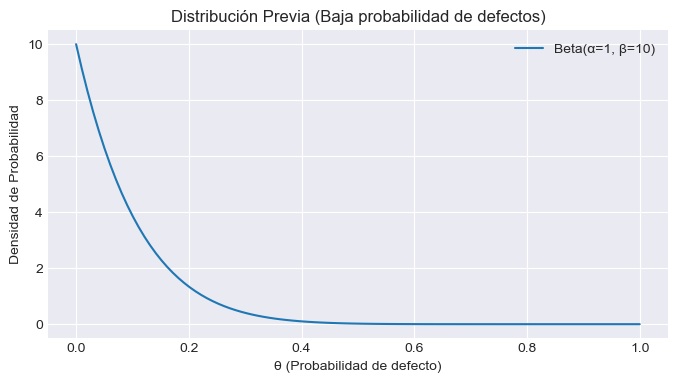

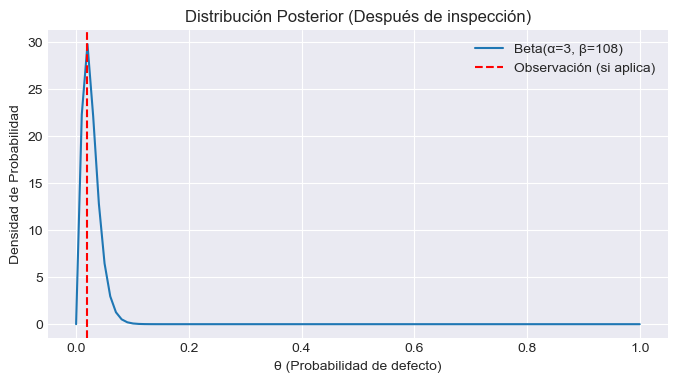

In [5]:
# Función para graficar la distribución Beta
def graficar_beta(a, b, datos, título, observaciones=None):
    valores_theta = np.linspace(0, 1, 100)
    pdf_vals = beta(a, b).pdf(valores_theta)
    plt.figure(figsize=(8, 4))
    plt.plot(valores_theta, pdf_vals, label=f'Beta(α={a}, β={b})')
    if observaciones:
        for d in observaciones:
            plt.axvline(x=d, color='r', linestyle='--', label='Observación (si aplica)')
    plt.title(título)
    plt.xlabel('θ (Probabilidad de defecto)')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    plt.show()

# Graficar la distribución previa
graficar_beta(alpha_prior, beta_prior, [], 'Distribución Previa (Baja probabilidad de defectos)')

# Graficar la distribución posterior con las observaciones
observaciones = [éxitos / piezas_inspeccionadas]
graficar_beta(alpha_posterior, beta_posterior, observaciones, 'Distribución Posterior (Después de inspección)', observaciones)
    